# Data Analysis Project

# Data Cleaning and Structuring

## Setup

In [232]:
import pandas as pd
import numpy as np

**Import the packages** we need. If we do not have the packages, we have to intall them. Therefore, install
>`pip install pandas-datareader`
>`pip install wbdata`

In [233]:
import pandas_datareader
import datetime

setup to download data directly from world data bank

In [234]:
from pandas_datareader import wb

## Download Data directly from the World Data Bank 

Define the countries for the download:
We choose China, Japan, Brazil, U.S., Denmark, Spain, Turkmenistan, India, Nigeria

In [235]:
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

Define indicator for the download:
We choose GDP per capita, GDP(current US $), Population total, Urban Population in %, Fertility Rate, Literacy rate

In [236]:
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

We download the data and have a look at the table.

In [237]:
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.9823851831","2,055,505,502,224.73",209288278,86.309,nan,nan
1,Brazil,2016,"10,868.6534435352","1,793,989,048,409.29",207652865,86.042,1.726,nan
2,Brazil,2015,"11,351.5657481703","1,802,214,373,741.32",205962108,85.77,1.74,92.0479
3,Brazil,2014,"11,870.1484076345","2,455,993,625,159.37",204213133,85.492,1.753,91.7294299999999
4,Brazil,2013,"11,915.4170541095","2,472,806,919,901.67",202408632,85.209,1.765,91.48424
5,Brazil,2012,"11,673.7705356922","2,465,188,674,415.03",200560983,84.923,1.777,91.33785
6,Brazil,2011,"11,560.4187506263","2,616,201,578,192.25",198686688,84.631,1.79,91.41124
7,Brazil,2010,"11,224.1540829355","2,208,871,646,202.82",196796269,84.335,1.805,90.37918
8,Brazil,2009,"10,538.7782816712","1,667,019,780,934.28",194895996,84.044,1.824,90.29821
9,Brazil,2008,"10,656.869465705","1,695,824,571,927.15",192979029,83.749,1.851,90.03662


We save the data file as an excel sheet.

IMPORTANT: Change the following code to your's and if you run it twice you need to change the name or we figure sth out on how to overwrite the existing one

In [238]:
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
data_wb.to_excel(r"./data_wb1.xlsx")

## Overview of the data

In [239]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

IMPORTANT: Find a way to combine the 2 decimals and the format of floats

In [240]:
# Bianca
#make the data pretty:
pd.options.display.float_format = '{:,}'.format

round(data_wb.head(),2)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48


In [241]:
# Bianca
#new variable for gdp
data_wb['gdp_in_bil'] = data_wb['gdp']/1000000000

round(data_wb.head(),2) #just to check


,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr,gdp_in_bil
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan,"2,055.51"
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan,"1,793.99"
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05,"1,802.21"
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73,"2,455.99"
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48,"2,472.81"


In [242]:
# Bianca
#drop old variable for gdp
del data_wb['gdp']
round(data_wb.head(),2)

#drop old GDP
#data_wb.drop(['gdp'], axis = 1, inplace = True)

#check that its droped 
#data_wb.head(5)

#new interpretation of GDP: GDP (current $US), measured in 100 millions -> change description

,country,year,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil
0,Brazil,2017,"10,888.98",209288278,86.31,nan,nan,"2,055.51"
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,nan,"1,793.99"
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,92.05,"1,802.21"
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,91.73,"2,455.99"
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,91.48,"2,472.81"


Get an overview of the observations and variables

In [243]:
data_wb.shape 

(252, 8)

We perform a summary statistics to get an overview of our dataset

In [244]:
round(data_wb.describe(),2)

,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil
count,252.0,252.0,252.0,243.0,37.0,252.0
mean,"21,233.4","353,535,362.68",62.67,2.5,87.0,"2,711.96"
std,"20,848.11","464,366,860.3",22.31,1.43,15.39,"4,160.88"
min,530.89,"3,683,966.0",25.55,1.13,48.22,2.38
25%,"2,131.25","40,015,504.75",42.57,1.55,88.62,275.61
50%,"9,117.39","133,683,074.5",76.1,1.93,91.48,684.5
75%,"42,252.61","309,914,885.75",81.58,2.86,97.75,"3,939.73"
max,"61,582.17","1,386,395,000.0",91.54,6.49,99.7,"19,390.6"


Maybe use a gdp in Millions and then do sth to decimals

## Detect missing data

We count missing data

In [245]:
data_wb.isnull().sum().sum()

224

We look how many observations each variable has.

In [246]:
data_wb.count()

country       252
year          252
gdp_pC        252
pop           252
urban_pop%    252
frt           243
litr           37
gdp_in_bil    252
dtype: int64

We search for the number of missing values of each variable. (Same step as before, only the other way around.)

In [247]:
data_wb.isnull().sum()

country         0
year            0
gdp_pC          0
pop             0
urban_pop%      0
frt             9
litr          215
gdp_in_bil      0
dtype: int64

We drop literacy rate, because this variable has nearly no data. 

In [248]:
data_wb.drop(['litr'], axis = 1, inplace = True)

We search for the nine missing values of fertility rate. It seems that there is no data of the fertility rate for the year 2017. 

In [249]:
round(data_wb.groupby('year').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
year,,,,,
1990,"17,322.45","296,754,760.0",57.06,2.98,"1,220.28"
1991,"17,480.06","301,483,292.67",57.39,2.92,"1,308.71"
1992,"17,614.3","306,083,205.0",57.71,2.86,"1,377.01"
1993,"17,609.77","310,600,879.44",58.04,2.79,"1,465.41"
1994,"18,033.67","315,117,504.67",58.36,2.73,"1,598.08"
1995,"18,406.36","319,614,237.22",58.7,2.67,"1,757.44"
1996,"18,865.59","324,075,633.0",59.06,2.61,"1,768.65"
1997,"19,293.24","328,551,075.67",59.42,2.57,"1,788.61"
1998,"19,603.76","332,962,293.0",59.78,2.53,"1,809.05"


We look whether every country misses the data of the fertility rate for the year 2017.

In [250]:
round(data_wb.loc[data_wb['year'] == "2017", :].head(-1),2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
0,Brazil,2017,"10,888.98",209288278,86.31,nan,"2,055.51"
28,China,2017,"7,329.09",1386395000,57.96,nan,"12,237.7"
56,Denmark,2017,"61,582.17",5769603,87.76,nan,324.87
84,Spain,2017,"32,405.75",46572028,80.08,nan,"1,311.32"
112,India,2017,"1,964.6",1339180127,33.6,nan,"2,600.82"
140,Japan,2017,"48,556.93",126785797,91.54,nan,"4,872.14"
168,Nigeria,2017,"2,412.2",190886311,49.52,nan,375.75
196,Turkmenistan,2017,"7,317.55",5758075,51.15,nan,37.93


We drop the year 2017

In [251]:
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)

## Cleaned dataset

We perform a summary statistic of our cleaned dataset

In [252]:
round(data_wb.describe(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
count,243.0,243.0,243.0,243.0,243.0
mean,"21,091.48","351,664,843.62",62.44,2.5,"2,634.6"
std,"20,765.76","461,984,890.15",22.36,1.43,"4,039.98"
min,530.89,"3,683,966.0",25.55,1.13,2.38
25%,"2,068.46","39,973,620.5",42.11,1.55,271.04
50%,"8,924.9","131,972,533.0",76.1,1.93,655.42
75%,"42,214.99","308,054,975.0",81.39,2.86,"3,746.61"
max,"61,174.55","1,378,665,000.0",91.46,6.49,"18,624.47"


In [253]:
data_wb.shape

(243, 7)

We control whether the dataset is balanced.

In [254]:
data_wb.count()

country       243
year          243
gdp_pC        243
pop           243
urban_pop%    243
frt           243
gdp_in_bil    243
dtype: int64

Fertility rate//
Group B//
Change the number

# Data Analysis

Average level of every variable for each single country.

overview shows countries with a high gdp per capita have a low fertility rate. Countries with a high gdp per capita have a huge share of urban population. We can start to think about the relations between the variables. 

In [255]:
round(data_wb.groupby('country').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
country,,,,,
Brazil,"9,595.04","180,812,509.93",81.31,2.18,"1,183.42"
China,"2,945.46","1,276,308,703.7",40.55,1.65,"3,606.57"
Denmark,"54,864.22","5,401,958.63",85.86,1.76,238.79
India,994.89,"1,104,088,507.19",28.89,3.11,935.46
Japan,"42,941.81","126,685,574.48",83.94,1.4,"4,715.85"
Nigeria,"1,820.09","135,188,798.89",38.11,6.03,203.29
Spain,"28,067.42","42,809,614.85",77.17,1.28,972.34
Turkmenistan,"3,568.09","4,675,784.89",46.95,3.1,13.47
United States,"45,026.29","289,012,140.0",79.19,1.99,"11,842.19"


## Interactive plot

 <span style="font-family: Arial; font-size:2.5em;color:black"> Interactive plot </p>

Now, we want to make an interactive plot which displays the development of GDP per capita over time, 
for the different countries.  

First, import the necessary packages and tools: 

**Import the packages** we need. If we do not have the packages, we have to intall them. Therefore, install
>`pip install matplotlib`
>`pip install ipywidgets`

In [256]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


Then, define the relevant variables in a ways which simplifies the coding: 

In [257]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


Create a function constructing a figure: 

In [258]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



Make it interactive with a drop down menu:

In [259]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

We can see that the overall trend for the selected countries is increasing GDP per capita.
However, for the Western countries and Japan we can see the trace of the 2008 financial crisis.  For Spain, 
one of the countries that suffered most from this crisis, the dip is particularly visible. It is also worth noticing that China fared better than most industustrial nations during this crisis. This is partly due to Chinas closed nature, which made them less vulnerable to financial friction in the world economy. 

 <span style="font-family: Arial; font-size:2.5em;color:black"> World Map </p>

## World Map

In [208]:
# Bianca
# try folium circle
# Python God: https://www.kaggle.com/rachan/how-to-folium-for-maps-heatmaps-time-analysis
#https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

import folium

ModuleNotFoundError: No module named 'folium'

In [209]:
#Bianca
data_wb.groupby('country').mean()

,gdp_pC,pop,urban_pop%,frt
country,,,,
Brazil,"9,595.044474040149","180,812,509.92592594",81.30911111111111,2.179925925925926
China,"2,945.4643286685964","1,276,308,703.7037036",40.55207407407407,1.6533703703703704
Denmark,"54,864.22462146124","5,401,958.62962963",85.86040740740742,1.7607407407407407
India,994.891572655445,"1,104,088,507.1851852",28.891740740740747,3.113185185185185
Japan,"42,941.81097519505","126,685,574.48148148",83.9354074074074,1.3951851851851853
Nigeria,"1,820.0941732234444","135,188,798.8888889",38.11422222222223,6.028370370370372
Spain,"28,067.420728963334","42,809,614.85185185",77.1717037037037,1.2848148148148146
Turkmenistan,"3,568.0943748309674","4,675,784.888888889",46.94514814814815,3.099777777777777
United States,"45,026.29087115506","289,012,140.0",79.18559259259261,1.9917222222222226


In [210]:
#Bianca
row_indexes=data_wb[data_wb['country']== 'Brazil'].index
data_wb.loc[row_indexes,'Lat']= -14.2350
data_wb.loc[row_indexes,'Lon']= -51.9253

row_indexes=data_wb[data_wb['country']== 'China'].index
data_wb.loc[row_indexes,'Lat']= 33.5449
data_wb.loc[row_indexes,'Lon']= 103.149

row_indexes=data_wb[data_wb['country']== 'Denmark'].index
data_wb.loc[row_indexes,'Lat']= 56.2639
data_wb.loc[row_indexes,'Lon']= 9.5018

row_indexes=data_wb[data_wb['country']== 'Spain'].index
data_wb.loc[row_indexes,'Lat']= 40.4637
data_wb.loc[row_indexes,'Lon']= -3.7492

row_indexes=data_wb[data_wb['country']== 'India'].index
data_wb.loc[row_indexes,'Lat']= 20.5937
data_wb.loc[row_indexes,'Lon']= 78.9629

row_indexes=data_wb[data_wb['country']== 'Japan'].index
data_wb.loc[row_indexes,'Lat']= 36.2048
data_wb.loc[row_indexes,'Lon']= 138.2529

row_indexes=data_wb[data_wb['country']== 'Nigeria'].index
data_wb.loc[row_indexes,'Lat']= 9.0820
data_wb.loc[row_indexes,'Lon']= 8.6753

row_indexes=data_wb[data_wb['country']== 'Turkmenistan'].index
data_wb.loc[row_indexes,'Lat']= 38.9697
data_wb.loc[row_indexes,'Lon']= 59.5563

row_indexes=data_wb[data_wb['country']== 'United States'].index
data_wb.loc[row_indexes,'Lat']= 37.0902
data_wb.loc[row_indexes,'Lon']= -95.7129

In [53]:
round(data_wb,2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,Lat,Lon
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,"1,793.99",-14.24,-51.93
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,"1,802.21",-14.24,-51.93
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,"2,455.99",-14.24,-51.93
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,"2,472.81",-14.24,-51.93
5,Brazil,2012,"11,673.77",200560983,84.92,1.78,"2,465.19",-14.24,-51.93
6,Brazil,2011,"11,560.42",198686688,84.63,1.79,"2,616.2",-14.24,-51.93
7,Brazil,2010,"11,224.15",196796269,84.34,1.8,"2,208.87",-14.24,-51.93
8,Brazil,2009,"10,538.78",194895996,84.04,1.82,"1,667.02",-14.24,-51.93
9,Brazil,2008,"10,656.87",192979029,83.75,1.85,"1,695.82",-14.24,-51.93
10,Brazil,2007,"10,244.27",191026637,83.45,1.88,"1,397.08",-14.24,-51.93


In [114]:
#Bianca works
#all in one

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()

selectedyear = 2010 #Select your preferred year
selectedvariable = 'gdp_pC' #select yout preferred variable

year_overview = data_wb.loc[data_wb['year']== str(selectedyear)] #selectedyear for a dropdown with used year
year_overview

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)
#converted_value = getattr(value, "tolist", lambda x=value: x)()


# I can add marker one by one on the map
for i in range(0,len(year_overview)):
    folium.Circle(
        location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
        #popup=locations2016_gdp_pC.iloc[i]['country'],
        radius=year_overview.iloc[i][selectedvariable]*10, #the smaller the original number, the higher the radius should be chosen
        color='green',
        fill=True
    ).add_to(map)


map

NameError: name 'folium' is not defined

In [85]:
#Bianca
#saving in a file
map.save('./map.py')

AttributeError: type object 'map' has no attribute 'save'

In [115]:
data_wb.drop(['Lat','Lon'], axis = 1, inplace = True)

 ## Data visualization: fertility rate per country

The average annual fertility rate presents an overview of the fertility rate for the copuntries and shows that Japan and Spain have the lowest fertility rate, while Nigeria has the highest.

Text(0, 0.5, 'Avg. annual fertility rate')

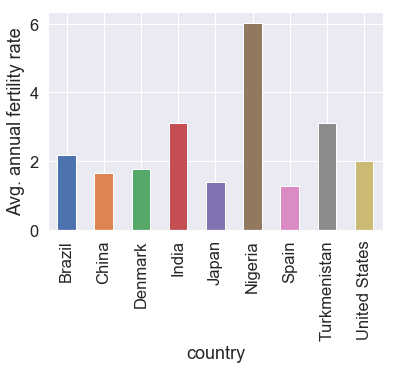

In [260]:
ax = data_wb.groupby('country').frt.mean().plot(kind='bar')
ax.set_ylabel('Avg. annual fertility rate')

The following graph presents annual growth rate of the fertility rate for each country. We observe that denmark is the only country with a negative growth rate. The leading country is India with a growth rate of 0.020 over the years. Surprisingly, Nigeria and the US have almost the same growth rate.

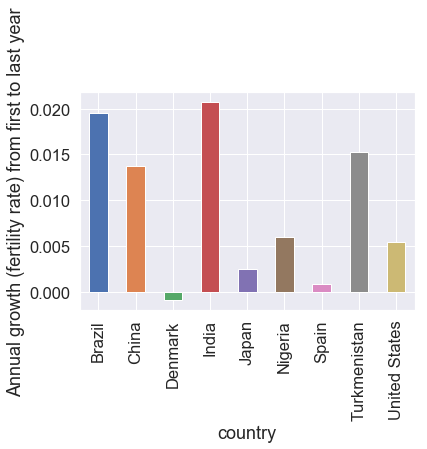

In [261]:
def annual_growth(x): 
    x_last    = x.values[-1]
    x_first   = x.values[0]
    num_years = len(x)
    
    growth_annualized = (x_last/x_first)**(1/num_years) - 1.0
    return growth_annualized

ax = data_wb.groupby('country')['frt'].agg(annual_growth).plot(kind='bar')
ax.set_ylabel('Annual growth (fertility rate) from first to last year'); 

Look what kind of variables we have. Years should be a numeric variable for the next grapph, but it is a objective (string).

In [262]:
data_wb.dtypes

country        object
year           object
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

We convert year into a float variable.

In [263]:
data_wb['year'] = data_wb.year.astype(float)

We prove what we have done.

In [264]:
data_wb.dtypes

country        object
year          float64
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

 ### Data visualization: fertility rate per country from 1990 untill 2016

In [265]:
data_wb = data_wb.set_index(["year", "country"])

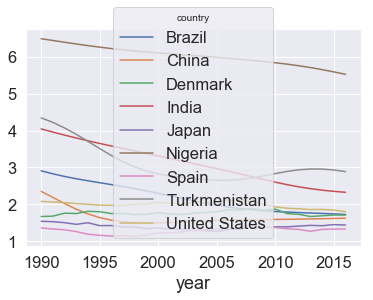

In [217]:
#plot fertility rate over the years
data_wb.unstack('country')['frt'].plot()

The fertility rate declines continously in the most countries. An exseption is Turkmenistan. In this country the fertility rate seems to oszilliate. The US had a little peak in 2007, but since then the fertility rate is declining. 

 <span style="font-family: Arial; font-size:2.5em;color:black"> Correlation Table </p>

## Correlation Table

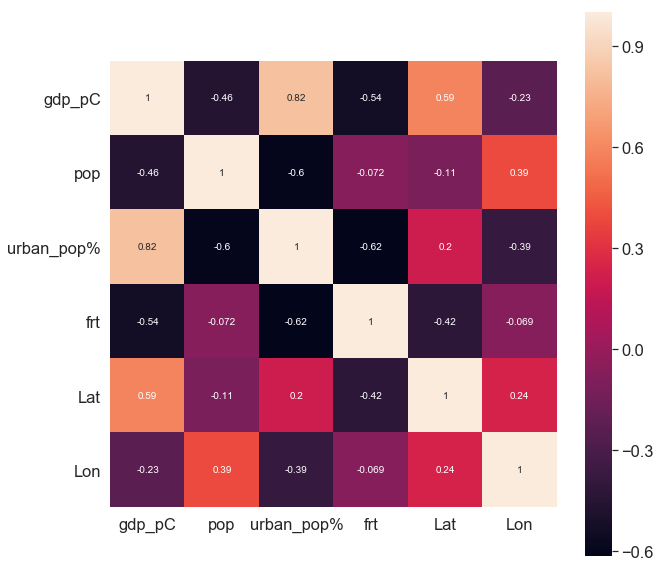

In [218]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data_wb.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [279]:
##wichtig
#Marie correlation table 
from linearmodels.panel import PooledOLS
from linearmodels.panel import RandomEffects
from linearmodels import PanelOLS
import statsmodels.api as sm

In [267]:
#data year and country are index
data_wb.dtypes

gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

In [268]:
##wichtig
#reset index
data_wb.reset_index(inplace = True )
#seems like reset does not work
data_wb.dtypes

year          float64
country        object
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

In [269]:
#convert year to datetime
data_wb['year'] = pd.to_datetime(data_wb['year'], format='%Y')

TypeError: 'float' object is unsliceable

In [270]:
#wichtig
#add column year to index
#data_wb.reset_index()
data_wb_2=data_wb.set_index(["country","year"], append=False)
data_wb_2
data_wb = data_wb_2

In [271]:
##wichtig
swap indexes
data_wb.index = data_wb.index.swaplevel(0,1)

SyntaxError: invalid syntax (<ipython-input-271-cc66ea2d4bab>, line 2)

In [272]:
##wichtig
print(data_wb.head())

                           gdp_pC        pop  urban_pop%   frt  \
country year                                                     
Brazil  2,016.0 10,868.6534435352  207652865      86.042 1.726   
        2,015.0 11,351.5657481703  205962108       85.77  1.74   
        2,014.0 11,870.1484076345  204213133      85.492 1.753   
        2,013.0 11,915.4170541095  202408632      85.209 1.765   
        2,012.0 11,673.7705356922  200560983      84.923 1.777   

                         gdp_in_bil  
country year                         
Brazil  2,016.0   1,793.98904840929  
        2,015.0   1,802.21437374132  
        2,014.0   2,455.99362515937  
        2,013.0   2,472.80691990167  
        2,012.0 2,465.1886744150297  


In [230]:
data_wb.frt

year     country      
2,016.0  Brazil           1.726
2,015.0  Brazil            1.74
2,014.0  Brazil           1.753
2,013.0  Brazil           1.765
2,012.0  Brazil           1.777
2,011.0  Brazil            1.79
2,010.0  Brazil           1.805
2,009.0  Brazil           1.824
2,008.0  Brazil           1.851
2,007.0  Brazil           1.884
2,006.0  Brazil           1.926
2,005.0  Brazil           1.975
2,004.0  Brazil           2.033
2,003.0  Brazil           2.096
2,002.0  Brazil           2.163
2,001.0  Brazil           2.232
2,000.0  Brazil             2.3
1,999.0  Brazil           2.365
1,998.0  Brazil           2.426
1,997.0  Brazil           2.482
1,996.0  Brazil           2.535
1,995.0  Brazil           2.586
1,994.0  Brazil           2.638
1,993.0  Brazil           2.694
1,992.0  Brazil           2.756
1,991.0  Brazil           2.827
1,990.0  Brazil           2.909
2,016.0  China            1.624
2,015.0  China            1.617
2,014.0  China             1.61
                 

In [273]:
# Marie tries reg
exog_vars = ['gdp_pC', 'pop', 'urban_pop%']
exog = sm.add_constant(data_wb[exog_vars])
mod = PooledOLS(data_wb.frt, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    frt   R-squared:                        0.6796
Estimator:                  PooledOLS   R-squared (Between):              0.7154
No. Observations:                 243   R-squared (Within):              -0.0943
Date:                Wed, Apr 03 2019   R-squared (Overall):              0.6796
Time:                        16:00:49   Log-likelihood                   -292.85
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      168.98
Entities:                           9   P-value                           0.0000
Avg Obs:                       27.000   Distribution:                   F(3,239)
Min Obs:                       27.000                                           
Max Obs:                       27.000   F-statistic (robust):             168.98
                            

In [127]:
#reset index
data_wb.reset_index(inplace = True )
#seems like reset does not work
data_wb.dtypes

index           int64
year          float64
country        object
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

In [276]:
data_wb.frt

country        year   
Brazil         2,016.0    1.726
               2,015.0     1.74
               2,014.0    1.753
               2,013.0    1.765
               2,012.0    1.777
               2,011.0     1.79
               2,010.0    1.805
               2,009.0    1.824
               2,008.0    1.851
               2,007.0    1.884
               2,006.0    1.926
               2,005.0    1.975
               2,004.0    2.033
               2,003.0    2.096
               2,002.0    2.163
               2,001.0    2.232
               2,000.0      2.3
               1,999.0    2.365
               1,998.0    2.426
               1,997.0    2.482
               1,996.0    2.535
               1,995.0    2.586
               1,994.0    2.638
               1,993.0    2.694
               1,992.0    2.756
               1,991.0    2.827
               1,990.0    2.909
China          2,016.0    1.624
               2,015.0    1.617
               2,014.0     1.61
                 

In [128]:
print(data_wb.head())

   index    year country            gdp_pC        pop  urban_pop%   frt  \
0      0 2,016.0  Brazil 10,868.6534435352  207652865      86.042 1.726   
1      1 2,015.0  Brazil 11,351.5657481703  205962108       85.77  1.74   
2      2 2,014.0  Brazil 11,870.1484076345  204213133      85.492 1.753   
3      3 2,013.0  Brazil 11,915.4170541095  202408632      85.209 1.765   
4      4 2,012.0  Brazil 11,673.7705356922  200560983      84.923 1.777   

           gdp_in_bil  
0   1,793.98904840929  
1   1,802.21437374132  
2   2,455.99362515937  
3   2,472.80691990167  
4 2,465.1886744150297  


In [277]:
# Marie tries reg effects
exog_vars = ['gdp_pC', 'pop', 'urban_pop%']
exog = sm.add_constant(data_wb[exog_vars])
mod = RandomEffects(data_wb.frt, exog)
pooled_res = mod.fit()
print(pooled_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    frt   R-squared:                        0.4314
Estimator:              RandomEffects   R-squared (Between):             -0.3045
No. Observations:                 243   R-squared (Within):               0.4612
Date:                Wed, Apr 03 2019   R-squared (Overall):             -0.2707
Time:                        16:21:49   Log-likelihood                    11.640
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      60.452
Entities:                           9   P-value                           0.0000
Avg Obs:                       27.000   Distribution:                   F(3,239)
Min Obs:                       27.000                                           
Max Obs:                       27.000   F-statistic (robust):             60.452
                            

In [280]:
#marie testet pannel data
exog_vars = ['gdp_pC', 'pop', 'urban_pop%']
exog = sm.add_constant(data_wb[exog_vars])
mod = PanelOLS(data_wb.frt, exog, entity_effects=False, time_effects=False)
pooled_res = mod.fit()
print(pooled_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    frt   R-squared:                        0.6796
Estimator:                   PanelOLS   R-squared (Between):              0.7154
No. Observations:                 243   R-squared (Within):              -0.0943
Date:                Wed, Apr 03 2019   R-squared (Overall):              0.6796
Time:                        16:29:08   Log-likelihood                   -292.85
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      168.98
Entities:                           9   P-value                           0.0000
Avg Obs:                       27.000   Distribution:                   F(3,239)
Min Obs:                       27.000                                           
Max Obs:                       27.000   F-statistic (robust):             168.98
                            

In [ ]:
ab hier müsste unwichtig sein aber checke

In [129]:
#convert year to datetime
data_wb['year'] = pd.to_datetime(data_wb['year'], format='%Y')

TypeError: 'float' object is unsliceable

In [130]:
#add column year to index
data_wb=data_wb.set_index('year', append=True)

In [131]:
#swap indexes
data_wb.index = data_wb.index.swaplevel(0,1)

In [132]:
print(data_wb.head())

           index country            gdp_pC        pop  urban_pop%   frt  \
year                                                                      
2,016.0 0      0  Brazil 10,868.6534435352  207652865      86.042 1.726   
2,015.0 1      1  Brazil 11,351.5657481703  205962108       85.77  1.74   
2,014.0 2      2  Brazil 11,870.1484076345  204213133      85.492 1.753   
2,013.0 3      3  Brazil 11,915.4170541095  202408632      85.209 1.765   
2,012.0 4      4  Brazil 11,673.7705356922  200560983      84.923 1.777   

                   gdp_in_bil  
year                           
2,016.0 0   1,793.98904840929  
2,015.0 1   1,802.21437374132  
2,014.0 2   2,455.99362515937  
2,013.0 3   2,472.80691990167  
2,012.0 4 2,465.1886744150297  


In [63]:
#reg again
exog_vars = ['gdp_pC', 'pop', 'urban_pop%']
exog = sm.add_constant(data_wb[exog_vars])
mod = PooledOLS(data_wb.frt, exog)
pooled_res = mod.fit()
print(pooled_res)

ValueError: Series can only be used with a 2-level MultiIndex

In [45]:
data_wb

,year,country,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
0,"2,016.0",Brazil,"10,868.6534435352",207652865,86.042,1.726,"1,793.98904840929"
1,"2,015.0",Brazil,"11,351.5657481703",205962108,85.77,1.74,"1,802.21437374132"
2,"2,014.0",Brazil,"11,870.1484076345",204213133,85.492,1.753,"2,455.99362515937"
3,"2,013.0",Brazil,"11,915.4170541095",202408632,85.209,1.765,"2,472.80691990167"
4,"2,012.0",Brazil,"11,673.7705356922",200560983,84.923,1.777,"2,465.1886744150297"
5,"2,011.0",Brazil,"11,560.4187506263",198686688,84.631,1.79,"2,616.20157819225"
6,"2,010.0",Brazil,"11,224.1540829355",196796269,84.335,1.805,"2,208.8716462028196"
7,"2,009.0",Brazil,"10,538.7782816712",194895996,84.044,1.824,"1,667.01978093428"
8,"2,008.0",Brazil,"10,656.869465705",192979029,83.749,1.851,"1,695.82457192715"
9,"2,007.0",Brazil,"10,244.2671527554",191026637,83.448,1.884,"1,397.08434595039"


In [46]:
data_wb.index()

TypeError: 'RangeIndex' object is not callable

In [48]:
print(data_wb.head())

     year country            gdp_pC        pop  urban_pop%   frt  \
0 2,016.0  Brazil 10,868.6534435352  207652865      86.042 1.726   
1 2,015.0  Brazil 11,351.5657481703  205962108       85.77  1.74   
2 2,014.0  Brazil 11,870.1484076345  204213133      85.492 1.753   
3 2,013.0  Brazil 11,915.4170541095  202408632      85.209 1.765   
4 2,012.0  Brazil 11,673.7705356922  200560983      84.923 1.777   

           gdp_in_bil  
0   1,793.98904840929  
1   1,802.21437374132  
2   2,455.99362515937  
3   2,472.80691990167  
4 2,465.1886744150297  


In [50]:
#convert year to datetime
data_wb['year'] = pd.to_datetime(data_wb['year'], format='%Y')

TypeError: 'float' object is unsliceable

In [52]:
#add column year to index
data_wb=data_wb.set_index('year', append=True)

In [54]:
#swap indexes
data_wb.index = data_wb.index.swaplevel(0,1)

In [55]:
print(data_wb.head())

          country            gdp_pC        pop  urban_pop%   frt  \
year                                                               
2,016.0 0  Brazil 10,868.6534435352  207652865      86.042 1.726   
2,015.0 1  Brazil 11,351.5657481703  205962108       85.77  1.74   
2,014.0 2  Brazil 11,870.1484076345  204213133      85.492 1.753   
2,013.0 3  Brazil 11,915.4170541095  202408632      85.209 1.765   
2,012.0 4  Brazil 11,673.7705356922  200560983      84.923 1.777   

                   gdp_in_bil  
year                           
2,016.0 0   1,793.98904840929  
2,015.0 1   1,802.21437374132  
2,014.0 2   2,455.99362515937  
2,013.0 3   2,472.80691990167  
2,012.0 4 2,465.1886744150297  


In [56]:
model  = pd.stats.plm.PanelOLS(y=data_wb['frt'],x=df[['pop']],time_effects=True)

AttributeError: module 'pandas' has no attribute 'stats'